# Example 2. 

First, take an initial look at this notebook. Then, use "Kernel-> Restart & Run All" to re-evaluate the entire notebook. Running this notebook is a good test for your Python installation. 

This example will use Scipy to evaluate the analytic solution for a heat transfer problem, and Fipy to solve the same problem by the finite-volume method.

No more details will be given here. This will be done in the *Thermodynamique & Phénomènes de transport* course!

In [1]:
import numpy as np
from numpy import exp
from scipy.special import jn_zeros, j0, j1
import matplotlib.pyplot as plt
import fipy as fp
print('Fipy version',fp.__version__)

Fipy version 3.4.1


## Analytic solution.

See the book by Crank ("Mathematics of Diffusion"), page 78, section 5.3.

Equation (5.22) reads

$$
\frac{C-C_1}{C_0-C_1} = 1 - \frac{2}{a}
\sum_{n=1}^{\infty} \frac{\exp(-D\alpha_n^2 t) J_0(r\alpha_n)}
{\alpha_n J_1(a\alpha_n)}
$$


Here we will evaluate and plot this equation.

In [2]:
def crank522(r, t):
    '''evaluate eqn 5.22 for a given r,t
    
    the following global variables need to be set
    a : radius of cylinder
    D : diffusion coefficient
    Nterm : number of terms to be evaluated
    '''
    global a
    global D
    global Nterm
    
    aalp = jn_zeros(0,Nterm)
    alpha = aalp/a
    
    XJ0 = exp(-D * alpha**2 * t) * j0(r*alpha)
    AJ1 = alpha * j1(aalp)
    
    S = np.sum(XJ0/AJ1)
    
    return 1.0 - (2.0/a) * S

In [3]:
# set world parameters
a = 1.0
D = 1.0
Nterm = 20

In [4]:
# create radial axis
r = np.linspace(0.,1.,200)

In [5]:
# evaluate crank522 at different points in time, and plot
for t in [0.005, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1, 0.15,
          0.2, 0.3, 0.4, 0.6, 0.8]:
    c = np.array([crank522(rr,t) for rr in r])
    plt.plot(r,c)
plt.xlabel('rel. radial position')
plt.ylabel('rel. temperature')
plt.title('analytic solution')

Text(0.5, 1.0, 'analytic solution')

## Finite-volume solution with Fipy.

Define 1D cylindrical grid with a variable called 'c', initialized to an initial value of 0.0 everywhere.

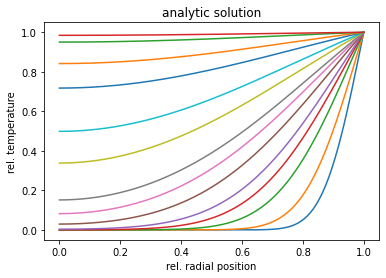

In [6]:
mesh = fp.CylindricalGrid1D(nr = 50, Lr = 1.0)

In [7]:
c = fp.CellVariable(mesh = mesh, value = 0.0)

Apply boundary condition: outer wall will be kept at 1.0. (Dirichlet boundary condition).

In [8]:
c.constrain(1.0, mesh.facesRight)

We should also define our partial differential equation! (With Fipy, this step comes last).

In [9]:
eq = fp.TransientTerm(var=c) == fp.DiffusionTerm(var=c, coeff=1.0)

Now, we solve the equation by taking time steps. We plot the solution at several specified time-points.

Text(0.5, 1.0, 'FVM (Fipy) solution')

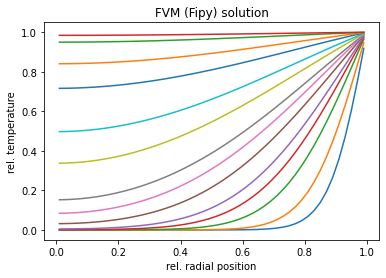

In [10]:
sample_i = [5,10,20,30,40,60,80,100,150,200,300,400,600,800]
for i in range(0,1001):
    if i in sample_i:
        plt.plot(c.mesh.cellCenters.value[0], c.value)
    eq.solve(dt = 0.001)
plt.xlabel('rel. radial position')
plt.ylabel('rel. temperature')
plt.title('FVM (Fipy) solution')

## End.